In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('sim_trace.csv')
df_link = pd.read_csv('sim_trace_link.csv')

In [34]:
df.shape

(76, 15)

In [35]:
df.head(50)

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,0.3,101.00002,101.30002,100.0,101.00002
1,2,COMP_M,1,1_01,M.USER.APP.1,1,5,2,0,None,0.3,101.00002,101.30002,100.0,101.00002
2,4,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,0.3,101.00002,101.30002,100.0,101.00002
3,3,COMP_M,2,2_01,M.USER.APP.2,2,6,3,0,None,0.3,102.00004,102.30004,100.0,102.00004
4,5,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,0.3,201.00002,201.30002,200.0,201.00002
5,6,COMP_M,1,1_01,M.USER.APP.1,1,5,2,0,None,0.3,201.00002,201.30002,200.0,201.00002
6,8,COMP_M,3,3_01,M.USER.APP.3,3,7,4,0,None,0.3,201.00002,201.30002,200.0,201.00002
7,7,COMP_M,2,2_01,M.USER.APP.2,2,6,3,0,None,0.3,202.00004,202.30004,200.0,202.00004
8,9,COMP_M,0,0_01,M.USER.APP.0,0,4,1,0,None,0.3,301.00002,301.30002,300.0,301.00002
9,10,COMP_M,1,1_01,M.USER.APP.1,1,5,2,0,None,0.3,301.00002,301.30002,300.0,301.00002


In [36]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [37]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [38]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [39]:
df_resample.shape

(19, 1)

In [40]:
df_resample.head()

,time_latency
date,
1970-01-01 00:01:40,1.250025
1970-01-01 00:03:20,1.250025
1970-01-01 00:05:00,1.250025
1970-01-01 00:06:40,1.250025
1970-01-01 00:08:20,1.250025


In [41]:
timeLatency = df_resample.time_latency.values

In [42]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

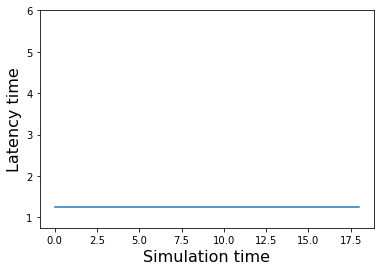

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,6)#timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)


In [44]:
df_link.head(50)


,id,type,src,dst,app,latency,message,ctime,size,buffer
0,1,LINK,1,0,0,1.00002,M.USER.APP.0,100.00000,20,0
1,2,LINK,2,0,1,1.00002,M.USER.APP.1,100.00000,20,1
2,3,LINK,3,2,2,1.00002,M.USER.APP.2,100.00000,20,2
3,4,LINK,4,0,3,1.00002,M.USER.APP.3,100.00000,20,3
4,3,LINK,2,0,2,1.00002,M.USER.APP.2,101.00002,20,0
5,5,LINK,1,0,0,1.00002,M.USER.APP.0,200.00000,20,0
6,6,LINK,2,0,1,1.00002,M.USER.APP.1,200.00000,20,1
7,7,LINK,3,2,2,1.00002,M.USER.APP.2,200.00000,20,2
8,8,LINK,4,0,3,1.00002,M.USER.APP.3,200.00000,20,3
9,7,LINK,2,0,2,1.00002,M.USER.APP.2,201.00002,20,0


In [45]:
df_link.shape

(95, 10)